Na początek zaimportujmy wszystkie potrzebne bibliteki klasy oraz funkcje:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, classification_report, RocCurveDisplay, \
  f1_score, recall_score, precision_score

# Wczytanie danych

Korzystamy ze zbioru weather.csv, który zawiera dane pogodowe z każdego dnia 2007 roku, odnotowane w mieście Cranbery, w Australii.

Wczytajmy go teraz za pomocą funkcji ```read _csv``` z biblioteki pandas, która zwróci nam obiekt ```DataFrame``` i sprawdzimy jak on wygląda:

In [2]:
data = pd.read_csv("weather.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2008-10-27,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2008-10-28,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2008-10-29,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2008-10-30,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


Widzimy wiele kolumn i wierszy. Aby najprościej potwierdzić ilośc rekordów, można użyć ```shape``` na rzecz zmiennej ```data```:

In [3]:
data.shape

(366, 24)

Mamy potwierdzenie, że w naszym zbiorze jest 366 rekordów 23 cechy oraz jedna kolumna odpowiadaj zbiorowi celu.

# Analiza danych
### Usuwanie niepotrzebnych wartości w zbiorze
Z racji tego, że chcemy stworzyć model, który na podstawie warunków atmosferycznych przewiduje deszcz (bądź jego brak) na przyszły dzień, na pierwszy rzut oka widzimy, że niektóre z wartości umiejscowione w naszym zbiorze będą miały nikły (jeżeli w ogóle jakiś) wpływ na efektywność w/w modelu. Są to kolumny "Lokalizacja", "Data", "DeszczDzisiaj" oraz "RISK_MM". Użyjemy do tego funkcji ```drop```:

In [4]:
df = data.drop(columns=["Date","Location","RainToday","RISK_MM"])
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No


### Usuwanie mniej ważnych kolumn

Duży problem stanowią kolumny odnośnie wiatru, gdyż wszystkie posiadają ten sam wąski zbiór wartości ("N","SE" etc.). Biorąc pod uwagę kodowanie one-hot, należałoby dodać $3\cdot 16 = 48$ nowych kolumn do naszego zbioru. Jest to ogromne zwiększenie wymiarowości, co przekłada się z koleii na złożoność naszego modelu. Aby tego uniknąć, należy pomyśleć, czy na pewno te kolumny są bardzo znaczące.   

Biorąc pod uwagę, że kolumny "WindGustDir" oraz "WindGustSpeed" odnoszą się do **NAJMOCNIEJSZEGO** wiatru w przeciągu danego dnia, postanowiłem zrezygonwać z czterech kolumn, które odnosiły się do wiatrów o różnych godzinach. W ten sposób znacząco ograniczę ostateczną ilość kolumn.

In [5]:
df = df.drop(columns=["WindDir9am", "WindDir3pm", "WindSpeed9am", "WindSpeed3pm"])
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,68,29,1019.7,1015.0,7,7,14.4,23.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,68,49,1018.3,1018.5,7,7,11.1,15.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,38,15,1016.1,1010.8,1,3,20.4,30.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,45,22,1020.0,1016.9,0,1,17.2,28.2,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,63,47,1024.0,1022.8,3,2,14.5,18.3,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,69,39,1021.0,1016.2,6,7,15.8,25.9,No


### Wartości NaN/null
Teraz sprawdzimy, ile komórek w naszej tabeli nie posiada żadnych wartości:

In [6]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustDir      3
WindGustSpeed    2
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

Nie ma ich dużo, jednak należy je usunąć ze zbioru, posłóży nam do tego funkcja ```dropna```:

In [7]:
df.dropna(inplace=True)

### Zakres danych

Pomijając na razie kierunek wiatru (zmienna kategoryczna), przyjrzyjmy się jak wyglądają zakresy poszczególnych danych:

<Axes: >

<Figure size 640x480 with 0 Axes>

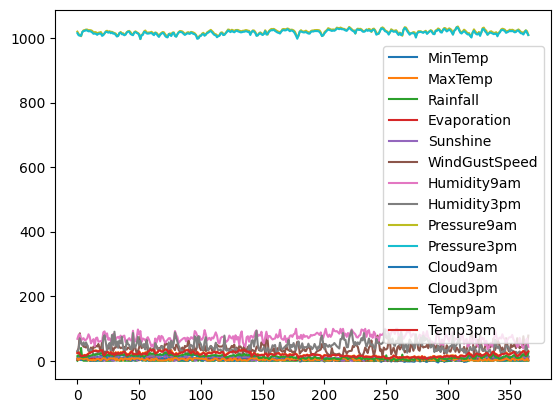

In [8]:
plt.figure()
df.plot()

Widzimy, że wartości dla ciśnienia w znaczący sposób odstają od reszty. Zajmiemy się tym już za chwilę, ale zanim, spojrzymy jeszcze jak sytuacja wygląda bez tych dwóch kolumn:

<Axes: >

<Figure size 640x480 with 0 Axes>

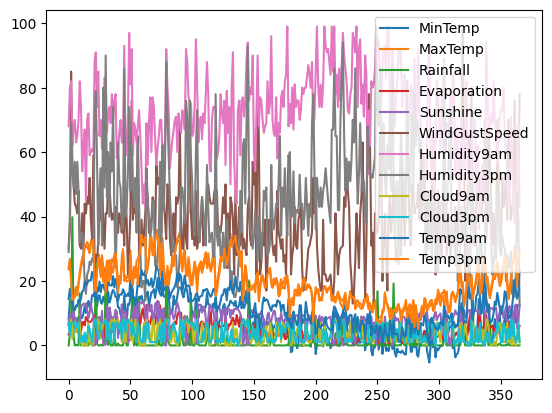

In [9]:
plt.figure()
df.drop(columns=["Pressure9am","Pressure3pm"]).plot()

Znów łatwo zauważyć, że takie dane jak zachmurzenie, ma o wiele mniejszy zakres, niż chociażby wilgotność. Ewidentnie istnieje tu potrzeba normalizacji danych, co osiągniemy używająć ```MinMaxScaler```:

In [10]:
from sklearn.preprocessing import MinMaxScaler

X = df.select_dtypes(np.number)
df[X.columns] = MinMaxScaler().fit_transform(X)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,0.507634,0.592199,0.000000,0.235294,0.463235,NW,0.200000,0.507937,0.192771,0.591837,0.500000,0.875,0.875,0.581301,0.629252,Yes
1,0.736641,0.684397,0.090452,0.308824,0.713235,ENE,0.305882,0.698413,0.277108,0.405612,0.318681,0.625,0.375,0.707317,0.700680,Yes
2,0.725191,0.560284,0.090452,0.411765,0.242647,NW,0.847059,0.730159,0.674699,0.331633,0.285714,1.000,0.875,0.621951,0.513605,Yes
3,0.709924,0.280142,1.000000,0.514706,0.669118,NW,0.482353,0.412698,0.518072,0.229592,0.280220,0.250,0.875,0.544715,0.306122,Yes
4,0.492366,0.301418,0.070352,0.397059,0.779412,SSE,0.435294,0.507937,0.433735,0.556122,0.596154,0.875,0.875,0.447154,0.350340,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.545802,0.819149,0.000000,0.544118,0.889706,NNW,0.741176,0.031746,0.024096,0.500000,0.384615,0.125,0.375,0.825203,0.846939,No
362,0.473282,0.737589,0.000000,0.838235,0.933824,N,0.411765,0.142857,0.108434,0.599490,0.552198,0.000,0.125,0.695122,0.785714,No
363,0.679389,0.436170,0.000000,0.602941,0.389706,ESE,0.352941,0.428571,0.409639,0.701531,0.714286,0.375,0.250,0.585366,0.448980,No
364,0.679389,0.684397,0.000000,0.352941,0.522059,NW,0.388235,0.523810,0.313253,0.625000,0.532967,0.750,0.875,0.638211,0.707483,No


Po przeprowadzeniu normalizacji, wykres wygląda następująco:

<Axes: >

<Figure size 640x480 with 0 Axes>

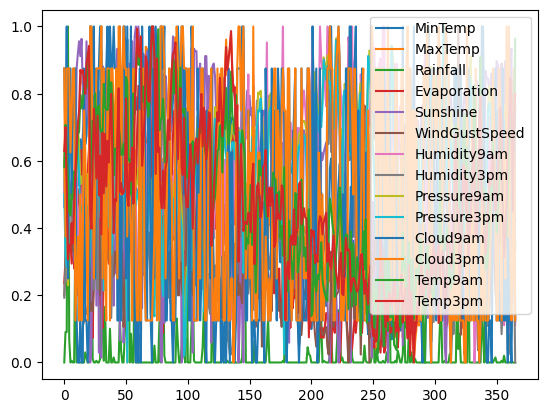

In [11]:
plt.figure()
df.plot()

Rozpiętość jest o wiele mniej zróżnicowana, co pomoże w procesie uczenia się, możemy przejść do tworzenia zbiorów testowych oraz treningowych.

# Tworzenie zbiorów testowych oraz treningowych


### One-Hot encoding
Aby nie musieć przejmować się istnieniem w naszym zbiorze zmiennych kategorycznych, zastosujemy tzw. "one-hot encoding", który pozwoli zamienić je na wartości ciągłe. Funkcja ```get_dummies``` pozwala na zastosowanie tej metody dla wybranej kolumny w naszym zbiorze. W tym przypadku będzie to kolumna o nazwie "WindGustDir":

Zmienną kategoryczną jest również nasza zmienna celu (wartości "TAK", lub "NIE"), Jest to podział binarny, dlatego łatwo będzie zmienić ją na zmienną ciągłą z pomocą ```LabelEncoder```

Przy okazji od razu wyłuskamy zbiór **y**:



In [12]:
dummies = pd.get_dummies(df["WindGustDir"])
le = LabelEncoder()
df["RainTomorrow"] = le.fit_transform(df["RainTomorrow"])
y = df.loc[:,"RainTomorrow"]

dummies

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
362,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
363,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 360, dtype: int64

Teraz wystarczy wyrzucić niepotrzebne już kolumny "WindGustDir", oraz "RainTomorrow" z naszego zbioru, a żeby otrzymać podzbiór **X**, złączymy powstałe kolumny ```dummies``` z ```df``` funkcją ```join```:

In [14]:
df = df.drop(columns=["WindGustDir","RainTomorrow"])
X = df.join(dummies)
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.507634,0.592199,0.000000,0.235294,0.463235,0.200000,0.507937,0.192771,0.591837,0.500000,...,0,1,0,0,0,0,0,0,0,0
1,0.736641,0.684397,0.090452,0.308824,0.713235,0.305882,0.698413,0.277108,0.405612,0.318681,...,0,0,0,0,0,0,0,0,0,0
2,0.725191,0.560284,0.090452,0.411765,0.242647,0.847059,0.730159,0.674699,0.331633,0.285714,...,0,1,0,0,0,0,0,0,0,0
3,0.709924,0.280142,1.000000,0.514706,0.669118,0.482353,0.412698,0.518072,0.229592,0.280220,...,0,1,0,0,0,0,0,0,0,0
4,0.492366,0.301418,0.070352,0.397059,0.779412,0.435294,0.507937,0.433735,0.556122,0.596154,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.545802,0.819149,0.000000,0.544118,0.889706,0.741176,0.031746,0.024096,0.500000,0.384615,...,1,0,0,0,0,0,0,0,0,0
362,0.473282,0.737589,0.000000,0.838235,0.933824,0.411765,0.142857,0.108434,0.599490,0.552198,...,0,0,0,0,0,0,0,0,0,0
363,0.679389,0.436170,0.000000,0.602941,0.389706,0.352941,0.428571,0.409639,0.701531,0.714286,...,0,0,0,0,0,0,0,0,0,0
364,0.679389,0.684397,0.000000,0.352941,0.522059,0.388235,0.523810,0.313253,0.625000,0.532967,...,0,1,0,0,0,0,0,0,0,0


Mamy już odzielne zbiory **X** oraz **y**, ostatnie co nam zostało to podzielenie wszystkiego na zbiory treningowe oraz testowe przy użyciu ```train_test_split```:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Klasyfikowanie

Teraz czas na sprawdzenie jak ze zbiorem poradzą sobie różne klasyfikatory, aby nie powtarzać się przy każdym z osobna, teraz omówimy jakie metryki będą opisywane.

Dla każdego modelu, sprawdzać będziemy takie metryki jak dokładność, precyzja, wynik-F1 itp. Posłuży nam do tego bardzo przydatna funkcja ```classification_report```, która daje nam te informacje w czytelnym formacie.

Oprócz tego, tam gdzie to możliwe, sporządzimy odpowiednie macierze pomyłek, a poza tym wykresy ROC.

In [16]:
metrics = {"accuracy":[], "precision":[], "recall":[], "f1-score":[]}

### Perceptron

Na początek zaczniemy od zwykłego perceptrona

In [17]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
y_pred_train = ppn.predict(X_train)
y_pred_test = ppn.predict(X_test)

In [19]:
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test))
metrics["precision"].append(precision_score(y_test, y_pred_test))
metrics["recall"].append(recall_score(y_test, y_pred_test))
metrics["f1-score"].append(f1_score(y_test, y_pred_test))

In [20]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        88
           1       0.65      0.75      0.70        20

    accuracy                           0.88       108
   macro avg       0.80      0.83      0.81       108
weighted avg       0.89      0.88      0.88       108



In [21]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train, cm_test

(array([[191,  16],
        [ 15,  30]]),
 array([[80,  8],
        [ 5, 15]]))

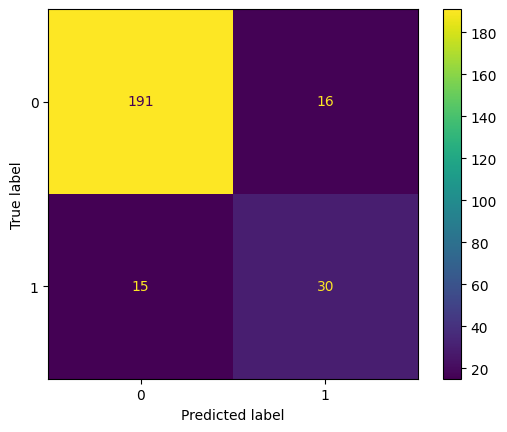

In [22]:
ConfusionMatrixDisplay(cm_train).plot()

Widzimy że radzi sobie całkiem dobrze zarówno z przewidywaniami pozytywnymi jak i negatywnymi. Sprawdzimy jeszcze wykres ROC:

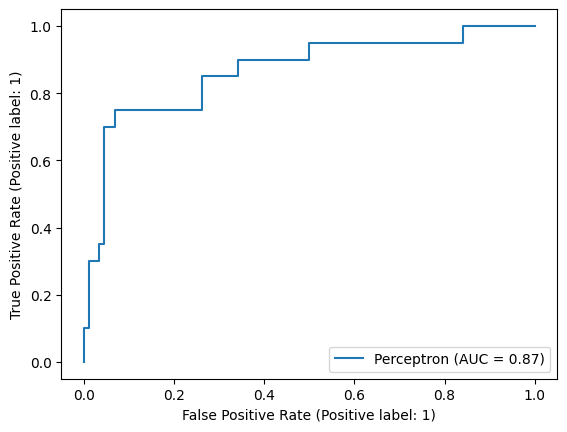

In [23]:
RocCurveDisplay.from_estimator(ppn,X_test,y_test)

### Adaline


Przejdźmy teraz do innego modelu, a mianowicie Adaline. Tutaj przed podejściem do dopasowywania czy przewidywania, należy w odpowiedni sposób przekonwertować nasze zbióry y, by ich wartości były w zbiorze {-1,1}.

In [24]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)

            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)

            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)



In [25]:
y_train_ada = np.where(y_train == 1, 1, -1)

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

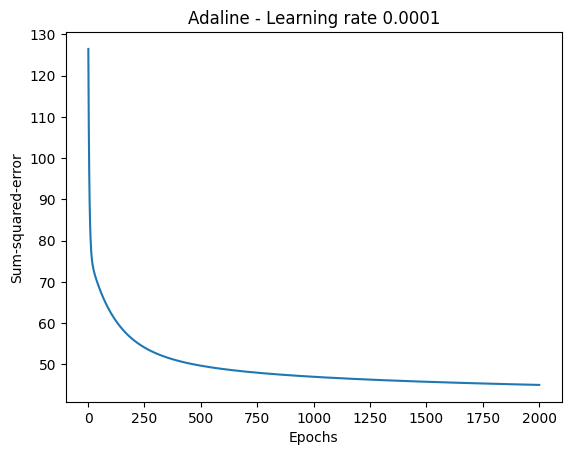

In [26]:
ada_gd = AdalineGD(n_iter=2000, eta=0.0001).fit(X_train, y_train_ada)
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_)
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')

In [27]:
y_pred_train_ada = ada_gd.predict(X_train)
y_pred_test_ada = ada_gd.predict(X_test)
y_pred_train_ada

array([-1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1

In [28]:
y_train_ada = np.where(y_train == 1, 1, -1)
y_test_ada = np.where(y_test == 1, 1, -1)
metrics["accuracy"].append(accuracy_score(y_test_ada, y_pred_test_ada))
metrics["precision"].append(precision_score(y_test_ada, y_pred_test_ada))
metrics["recall"].append(recall_score(y_test_ada, y_pred_test_ada))
metrics["f1-score"].append(f1_score(y_test_ada, y_pred_test_ada))

In [29]:
print(classification_report(y_test_ada,y_pred_test_ada))

              precision    recall  f1-score   support

          -1       0.91      0.95      0.93        88
           1       0.75      0.60      0.67        20

    accuracy                           0.89       108
   macro avg       0.83      0.78      0.80       108
weighted avg       0.88      0.89      0.88       108



Na pierwszy rzut oka wydaje się, że model działa lepiej od poprzedniego, ponieważ osiągnął wyższą dokładność zarówno na danych treningowych jak i testowych. Aby to potwierdzić, sprawdźmy jak wygląda macierz pomyłek

In [30]:
cm_train = confusion_matrix(y_train_ada, y_pred_train_ada)
cm_test = confusion_matrix(y_test_ada, y_pred_test_ada)
cm_train, cm_test

(array([[201,   6],
        [ 21,  24]]),
 array([[84,  4],
        [ 8, 12]]))

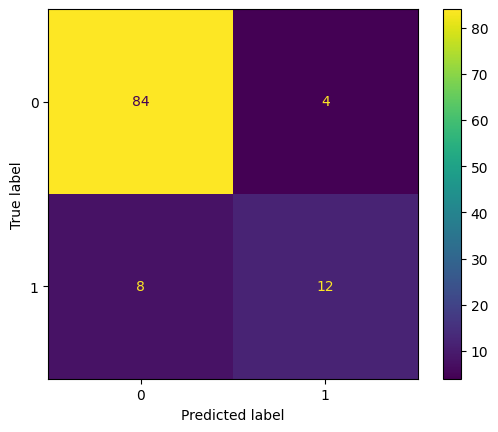

In [31]:
ConfusionMatrixDisplay(cm_test).plot()

Należy zauważyć, że mimo wyższej precyzji oraz większej ilości wyników prawdziwie negatywnych, nastąpił również wzrost w wynikach fałszywie negatywnych. Może być to spowodowane zarówno przez małą ilość przyszłych dni deszczowych w zbiorze, bądź efekt przeuczenia modelu.

### DecisionTreeClassifier


Użyłem tu maksymalnej głębokości na poziomie 5, gdyż dawała najlepsze wyniki:

[Text(0.52, 0.9166666666666666, 'x[9] <= 0.416\ngini = 0.293\nsamples = 252\nvalue = [207, 45]'),
 Text(0.26, 0.75, 'x[4] <= 0.658\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.16, 0.5833333333333334, 'x[2] <= 0.163\ngini = 0.375\nsamples = 28\nvalue = [7, 21]'),
 Text(0.08, 0.4166666666666667, 'x[4] <= 0.474\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.04, 0.25, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.12, 0.25, 'x[6] <= 0.548\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.08, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.16, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.24, 0.4166666666666667, 'x[12] <= 0.789\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.28, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36, 0.5833333333333334, 'x[8] <= 0.415\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.32, 0.416666

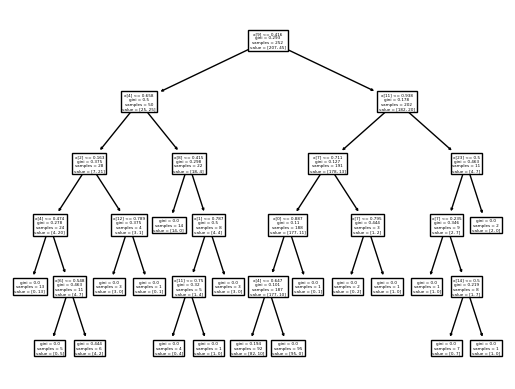

In [32]:
DTC = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
plot_tree(DTC)

In [33]:
y_pred_train_DTC = DTC.predict(X_train)
y_pred_train_DTC

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [34]:
y_pred_test_DTC = DTC.predict(X_test)
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test_DTC))
metrics["precision"].append(precision_score(y_test, y_pred_test_DTC))
metrics["recall"].append(recall_score(y_test, y_pred_test_DTC))
metrics["f1-score"].append(f1_score(y_test, y_pred_test_DTC))

In [35]:
print(classification_report(y_test,y_pred_test_DTC))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        88
           1       0.59      0.50      0.54        20

    accuracy                           0.84       108
   macro avg       0.74      0.71      0.72       108
weighted avg       0.83      0.84      0.84       108



In [36]:
cm_test = confusion_matrix(y_test, y_pred_test_DTC)
cm_test

array([[81,  7],
       [10, 10]])

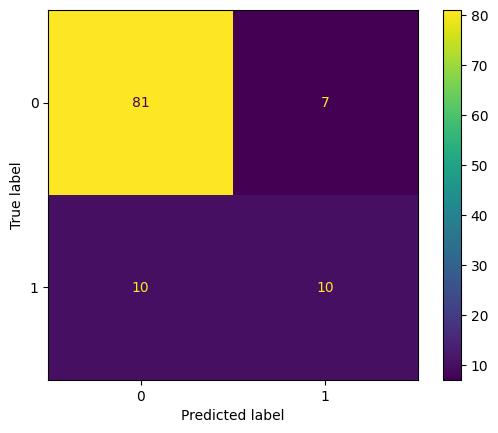

In [37]:
ConfusionMatrixDisplay(cm_test).plot()

### LogisticRegresion

In [38]:
lr = LogisticRegression().fit(X_train,y_train)

In [39]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test_lr))
metrics["precision"].append(precision_score(y_test, y_pred_test_lr))
metrics["recall"].append(recall_score(y_test, y_pred_test_lr))
metrics["f1-score"].append(f1_score(y_test, y_pred_test_lr))

In [40]:
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.71      0.50      0.59        20

    accuracy                           0.87       108
   macro avg       0.80      0.73      0.76       108
weighted avg       0.86      0.87      0.86       108



In [41]:
cm_test = confusion_matrix(y_test, y_pred_test_lr)
cm_test

array([[84,  4],
       [10, 10]])

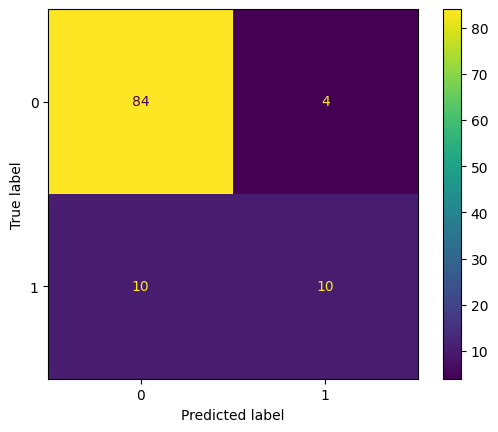

In [42]:
ConfusionMatrixDisplay(cm_test).plot()

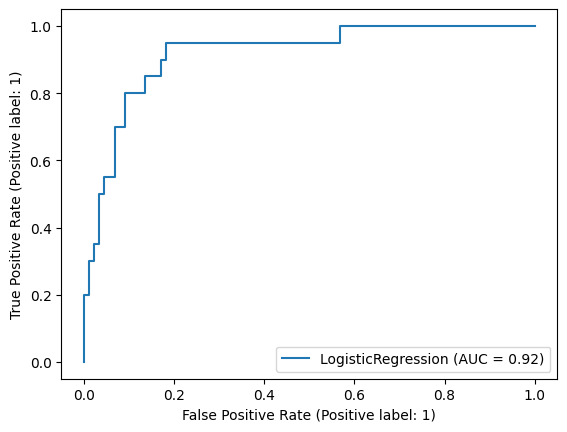

In [43]:
RocCurveDisplay.from_estimator(lr,X_test,y_test)

### KNeighbours

In [44]:
kn = KNeighborsClassifier().fit(X_train,y_train)

In [45]:
y_pred_train_kn = kn.predict(X_train)
y_pred_test_kn = kn.predict(X_test)
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test_kn))
metrics["precision"].append(precision_score(y_test, y_pred_test_kn))
metrics["recall"].append(recall_score(y_test, y_pred_test_kn))
metrics["f1-score"].append(f1_score(y_test, y_pred_test_kn))

In [46]:
print(classification_report(y_test,y_pred_test_kn))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        88
           1       0.67      0.30      0.41        20

    accuracy                           0.84       108
   macro avg       0.76      0.63      0.66       108
weighted avg       0.82      0.84      0.82       108



In [47]:
cm_test = confusion_matrix(y_test, y_pred_test_kn)
cm_test

array([[85,  3],
       [14,  6]])

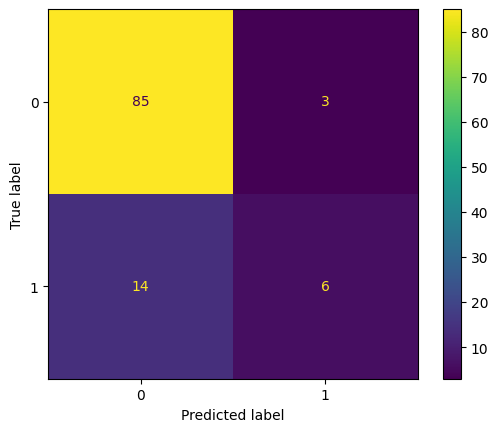

In [48]:
ConfusionMatrixDisplay(cm_test).plot()

### RandomForestClassifier


In [49]:
rfc = RandomForestClassifier().fit(X_train,y_train)

In [50]:
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test_rfc))
metrics["precision"].append(precision_score(y_test, y_pred_test_rfc))
metrics["recall"].append(recall_score(y_test, y_pred_test_rfc))
metrics["f1-score"].append(f1_score(y_test, y_pred_test_rfc))

In [51]:
print(classification_report(y_test,y_pred_test_rfc))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.67      0.50      0.57        20

    accuracy                           0.86       108
   macro avg       0.78      0.72      0.74       108
weighted avg       0.85      0.86      0.85       108



In [52]:
cm_test = confusion_matrix(y_test, y_pred_test_rfc)
cm_test

array([[83,  5],
       [10, 10]])

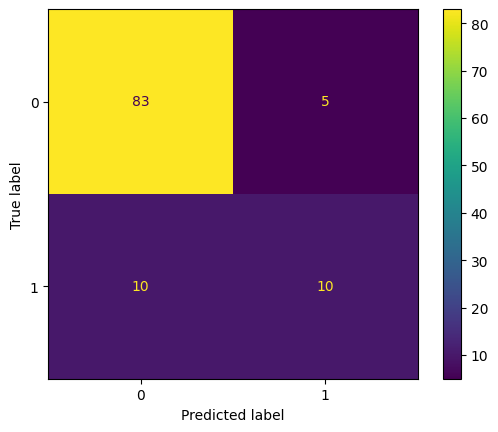

In [53]:
ConfusionMatrixDisplay(cm_test).plot()

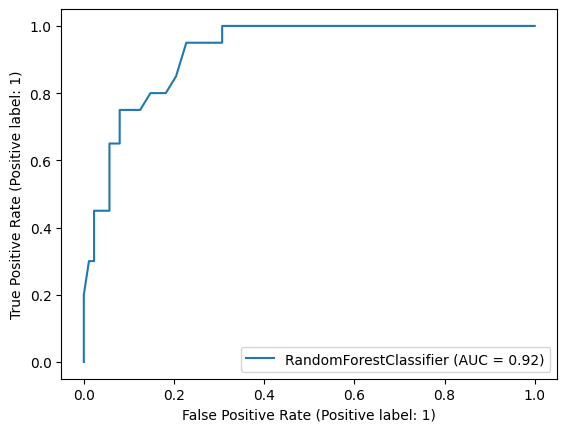

In [54]:
RocCurveDisplay.from_estimator(rfc,X_test,y_test)

### SVC

In [55]:
svc = SVC().fit(X_train,y_train)

In [56]:
y_pred_train_svc = svc.predict(X_train)
y_pred_test_svc = svc.predict(X_test)
metrics["accuracy"].append(accuracy_score(y_test, y_pred_test_svc))
metrics["precision"].append(precision_score(y_test, y_pred_test_svc))
metrics["recall"].append(recall_score(y_test, y_pred_test_svc))
metrics["f1-score"].append(f1_score(y_test, y_pred_test_svc))

In [57]:
print(classification_report(y_test,y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        88
           1       0.71      0.25      0.37        20

    accuracy                           0.84       108
   macro avg       0.78      0.61      0.64       108
weighted avg       0.83      0.84      0.81       108



In [58]:
cm_test = confusion_matrix(y_test, y_pred_test_svc)
cm_test

array([[86,  2],
       [15,  5]])

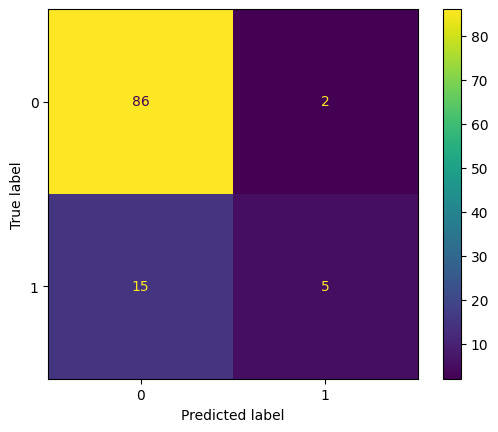

In [59]:
ConfusionMatrixDisplay(cm_test).plot()

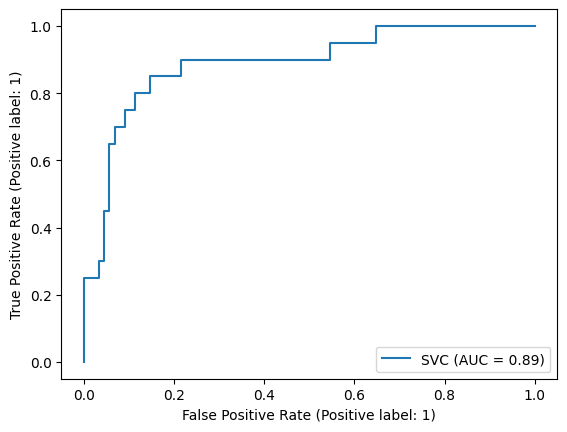

In [60]:
RocCurveDisplay.from_estimator(svc,X_test,y_test)

# Podsumowanie


Jak widać, wiekszość modeli radzi sobie na podobnym poziomie, jednak widać, że chociażby SVC oraz KNeighbours charakteryzują się bardzo wysokim stopniem wyników fałszywie negatywnych.

In [61]:
summary = pd.DataFrame(data=metrics,index=["Perceptron","Adaline","DecisionTreeClassigier","LogisticRegresion","KNeighboursClassifier","RandomForestClassifier","SVC"])
summary

,accuracy,precision,recall,f1-score
Perceptron,0.879630,0.652174,0.75,0.697674
Adaline,0.888889,0.750000,0.60,0.666667
DecisionTreeClassigier,0.842593,0.588235,0.50,0.540541
LogisticRegresion,0.870370,0.714286,0.50,0.588235
KNeighboursClassifier,0.842593,0.666667,0.30,0.413793
RandomForestClassifier,0.861111,0.666667,0.50,0.571429
SVC,0.842593,0.714286,0.25,0.370370


<Axes: >

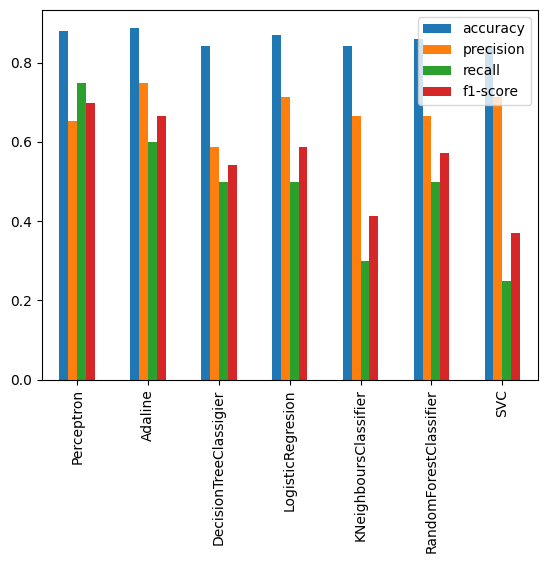

In [62]:
summary.plot.bar()